In [21]:
from pathlib import Path
import pandas as pd
import numpy as np
import nibabel as nb
import SUITPy as suit
import matplotlib.pyplot as plt
import seaborn as sb
import Functional_Fusion.atlas_map as am
from Functional_Fusion.dataset import *
import Functional_Fusion.matrix as matrix
import generativeMRF.evaluation as ev
from ProbabilisticParcellation.util import *
import ProbabilisticParcellation.parcel_hierarchy as ph
import pickle
import sys
sys.path.append("..")

base_dir = '/Volumes/diedrichsen_data$/data/FunctionalFusion'
if not Path(base_dir).exists():
    base_dir = '/srv/diedrichsen/data/FunctionalFusion'

### K=34 parcellations 

In [22]:
mname = 'Models_04/sym_MdPoNiIb_space-MNISymC3_K-34'
fileparts = mname.split('/')
split_mn = fileparts[-1].split('_')
info,model = load_batch_best(mname)


In [23]:
plt.figure(figsize=(20,5))
w_cos_sim,_,_ = ph.parcel_similarity(model,plot=False,sym=False)

<Figure size 2000x500 with 0 Axes>

In [25]:
plt.figure(figsize=(14,5))
sym=True
w_cos_sym,_,_ = ph.parcel_similarity(model,plot=False,sym=sym)
labels,clusters,leaves = ph.agglomative_clustering(w_cos_sym,sym=sym,method='ward',num_clusters=4,plot=True,cmap=None)

TypeError: 'NoneType' object is not callable

<Figure size 1400x500 with 0 Axes>

In [ ]:
W = ph.calc_mds(w_cos_sim,center=True)
M = np.zeros((clusters.max(),3))
for i in np.unique(clusters):
    M[i-1,:]=np.mean(W[clusters==i,:],axis=0)
M

In [ ]:
## Get the atlas parcellation
Prop = np.array(model.marginal_prob())
parcel = Prop.argmax(axis=0)+1
atlas = split_mn[2][6:]


In [ ]:
V=np.array([[-0.3,-0.6,1],[1,-.6,-.7],[1,1,1]]).T
V=ph.make_orthonormal(V)
m = np.array([0.65,0.65,0.65])
l = np.array([1,1,1])
cmap = ph.colormap_mds(W,target=(m,l,V),clusters=clusters,gamma=0)
labels, clusters, leaves = ph.agglomative_clustering(w_cos_sym,sym=sym,num_clusters=5,plot=True,cmap=cmap)


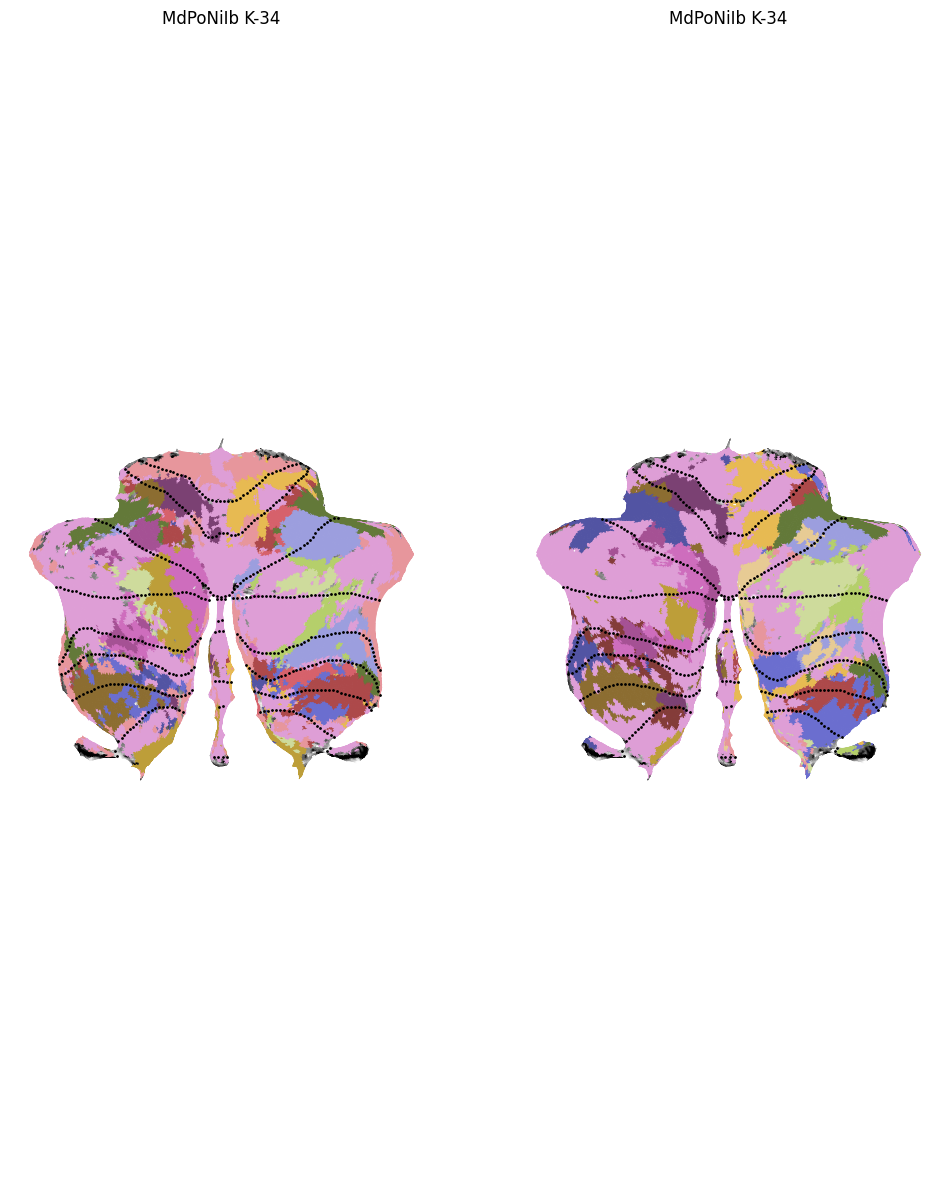

In [16]:
model_name = ['Models_04/asym_MdPoNiIb_space-MNISymC3_K-34',
            'Models_04/sym_MdPoNiIb_space-MNISymC3_K-34']
fig = plt.figure(figsize=(12,15))
plot_model_parcel(model_name,[1,2],cmap='tab20b',align=True)
plt.savefig("/Users/callithrix/Documents/Conferences/SfN22/minisymposium/slides/figures/parcellation_asym_vs_sym.png", dpi=100)